# **Laboratorio: ATQ – Trading Algorítmico con Quantiacs**

## **Objetivo del laboratorio**

Desarrollar un algoritmo de trading algorítmico utilizando la plataforma Quantiacs, aplicando técnicas de Machine Learning para predecir precios de activos financieros. Este laboratorio se centra en:

1.   Modificar el modelo de Machine Learning utilizado en el algoritmo.
2.   Cambiar el mercado de referencia de NASDAQ a S&P 500.
3. Seleccionar al menos 20 activos financieros y justificar su elección.
4. Incorporar nuevas variables que puedan mejorar la predicción de precios, explicando su relevancia.

## **1. Cambiar la técnica de Machine Learning**

Se reemplazó el modelo lineal (regresión lineal) por un **Random Forest Classifier**.

**Justificación:**

*   Los Random Forests son técnicas basadas en conjuntos que combinan múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste.
*   Son robustos frente a relaciones no lineales y pueden manejar grandes cantidades de datos multidimensionales, como los que se encuentran en el mercado financiero.
* Ofrecen información sobre la importancia de las variables, lo que facilita la interpretación de resultados.

In [ ]:
def get_model():
    """Crear el modelo de clasificacion Random Forest"""
    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    return model

## **2. Cambiar el mercado de referencia**

El mercado objetivo se cambió de NASDAQ al S&P 500, que representa una muestra más diversa y amplia de las empresas más importantes de Estados Unidos. Esto permite analizar datos más representativos del comportamiento general del mercado.

In [ ]:
# Cargar datos históricos del S&P 500 para los últimos 5 años
stock_data = qndata.stocks.load_spx_data(tail=365*5)

## **3. Selección de activos**

Se seleccionaron 20 activos de diferentes sectores económicos para garantizar una diversificación adecuada y capturar patrones específicos en cada sector:

**Lista de activos seleccionados:**

*   NAS:AAPL (Tecnología)
*   NAS:MSFT (Tecnología)
* NAS:GOOG (Tecnología)
* NAS:AMZN (Consumo discrecional)
* NYS:JNJ (Salud)
* NYS:XOM (Energía)
* NYS:PG (Consumo básico)
* NAS:NFLX (Tecnología)
* NAS:TSLA (Consumo discrecional)
* NYS:BRK.B (Financiero)
* NYS:V (Financiero)
* NYS:UNH (Salud)
* NYS:PFE (Salud)
* NYS:HD (Consumo discrecional)
* NYS:DIS (Comunicación)
* NYS:KO (Consumo básico)
* NYS:CVX (Energía)
* NYS:ZTS (Salud)
* NYS:MA (Financiero)
* NYS:ABBV (Salud)

**Justificación:** Esta selección diversificada incluye tecnología, energía, salud, consumo, y finanzas, para evaluar patrones específicos en diferentes sectores y mejorar la robustez de las predicciones.

In [ ]:
# Lista de activos seleccionados para incluir en la estrategia
assets = [
    "NAS:AAPL", "NAS:MSFT", "NAS:GOOG", "NAS:AMZN", "NYS:JNJ",
    "NYS:XOM", "NYS:PG", "NAS:NFLX", "NAS:TSLA", "NYS:BRK.B",
    "NYS:V", "NYS:UNH", "NYS:PFE", "NYS:HD", "NYS:DIS",
    "NYS:KO", "NYS:CVX", "NYS:ZTS", "NYS:MA", "NYS:ABBV"
]

## **4. Incorporación de nuevas variables**

Se agregaron nuevas variables relevantes para mejorar las predicciones de precios:

**Variables nuevas y su relevancia:**

*   *Volumen de transacciones:* Mide la liquidez del activo y puede indicar cambios de tendencia.
*   *Dividendos:* Reflejan la estabilidad financiera y el rendimiento esperado de un activo.
* *Volatilidad:* Captura la variabilidad del precio, crucial para identificar riesgos y oportunidades.

Estas variables complementan los indicadores técnicos tradicionales como MACD, RSI y oscilador estocástico, proporcionando información adicional sobre la dinámica del mercado.

In [ ]:
# Volumen de transacciones
    volume = data.sel(field="vol")
# Dividendos (rellenamos valores faltantes)
    dividends = data.sel(field="divs").ffill("time").bfill("time").fillna(0)
# volatility:
    volatility = qnta.tr(data.sel(field="high"), data.sel(field="low"), data.sel(field="close"))
    volatility = volatility / data.sel(field="close")
    volatility = qnta.lwma(volatility, 14)

# **Resultados obtenidos**

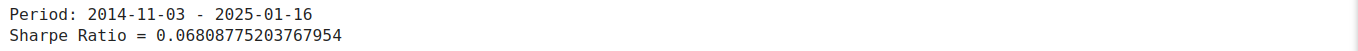

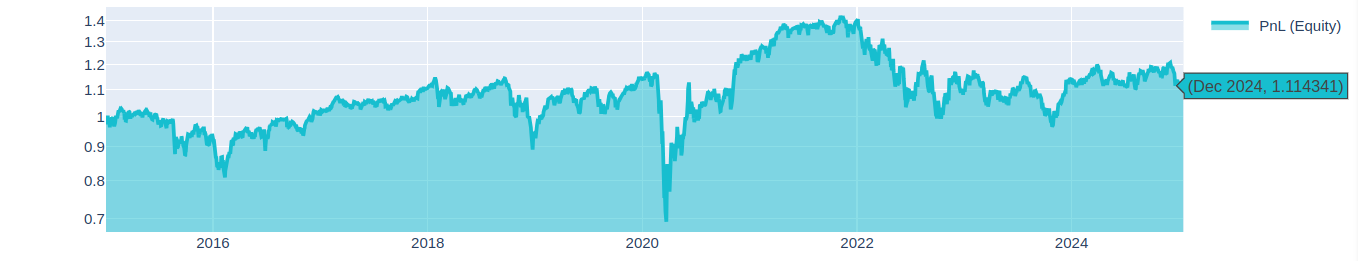

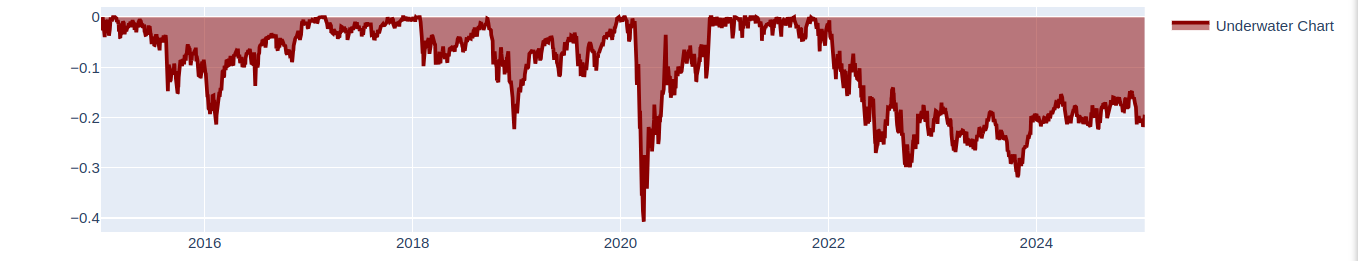

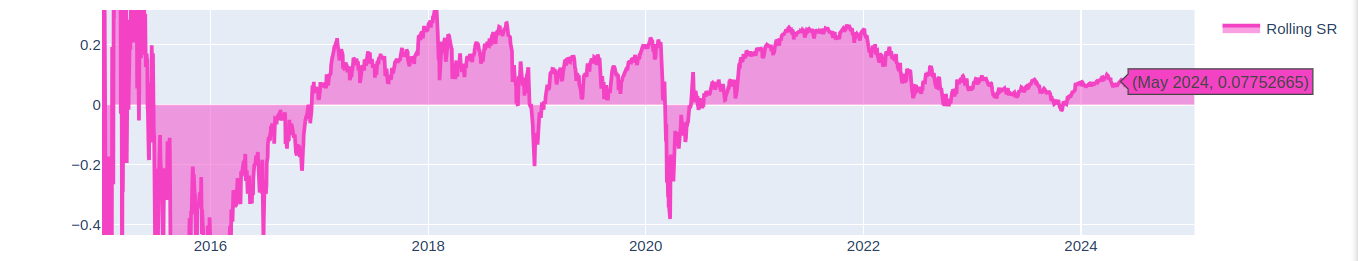

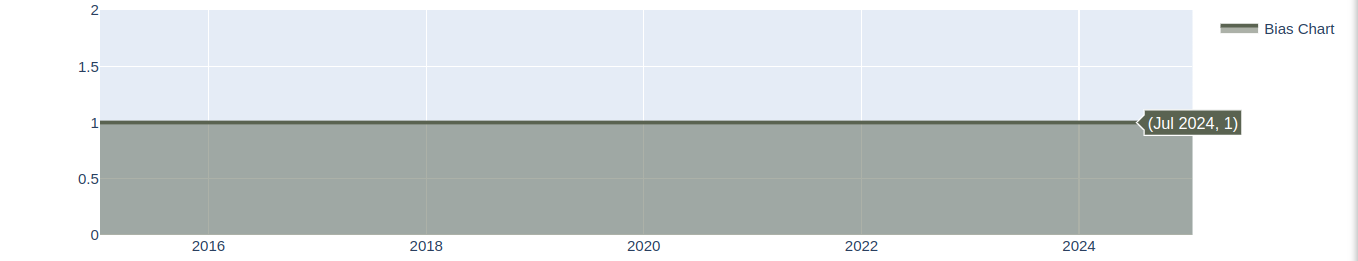